In [66]:
import wandb
api = wandb.Api()


In [141]:
from pathlib import Path
import json
import pandas as pd
import re

num_updates= [4, 6, 8]

def generate():
    for path in Path('artifacts').rglob('*.json'):
        pattern = r"run-(\w+)_(\w+)-tablereturns:v\d+"
        with path.open() as f:
            table = json.load(f)
        df = pd.DataFrame(table['data'], columns=table['columns'])
        match = re.search(pattern, str(path))
        df['run_id'] = match.group(1)
        id_within_sweep = int(match.group(2))
        n_updates = num_updates[id_within_sweep]
        df['num_updates'] = n_updates
        yield df
        
df = pd.concat(list(generate()), ignore_index=True)


df.loc[:, 'cuml_timestep'] = df.groupby(['idx', 'run_id', 'num_updates', 'step'])['timestep'].cumsum()
def keep_last_n_steps(group, n=5):
    steps = sorted(group['step'].unique())
    print(steps)
    top_n = steps[-n:]
    return group[group['step'].isin(top_n)]

df = df.groupby(['run_id', 'num_updates'], group_keys=False).apply(keep_last_n_steps)
df.num_updates.unique()



[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000, 46000, 48000]
[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000]
[0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000, 33000, 36000]
[0, 4430, 7034, 9358, 12268, 12499, 13003, 13282, 14074, 14134, 14966, 15431, 15495, 16991, 17567, 17907, 18054, 18120, 19440, 19540, 19618, 19699, 19786, 19846, 19908, 20132, 20234, 20304, 20376, 20452]
[0, 4090, 8330, 10700, 11740, 12680, 14432, 16154, 16474, 18058, 19258, 20512, 21544, 22669, 22912, 23260, 24779, 24911, 25051, 25384, 25579, 25702, 25917]
[0, 4500, 9384, 11680, 15299, 16612, 17844, 20472, 21606, 22686, 24454, 25846, 26745, 27493, 28501, 28735, 28858, 28990]


array([4, 6, 8])

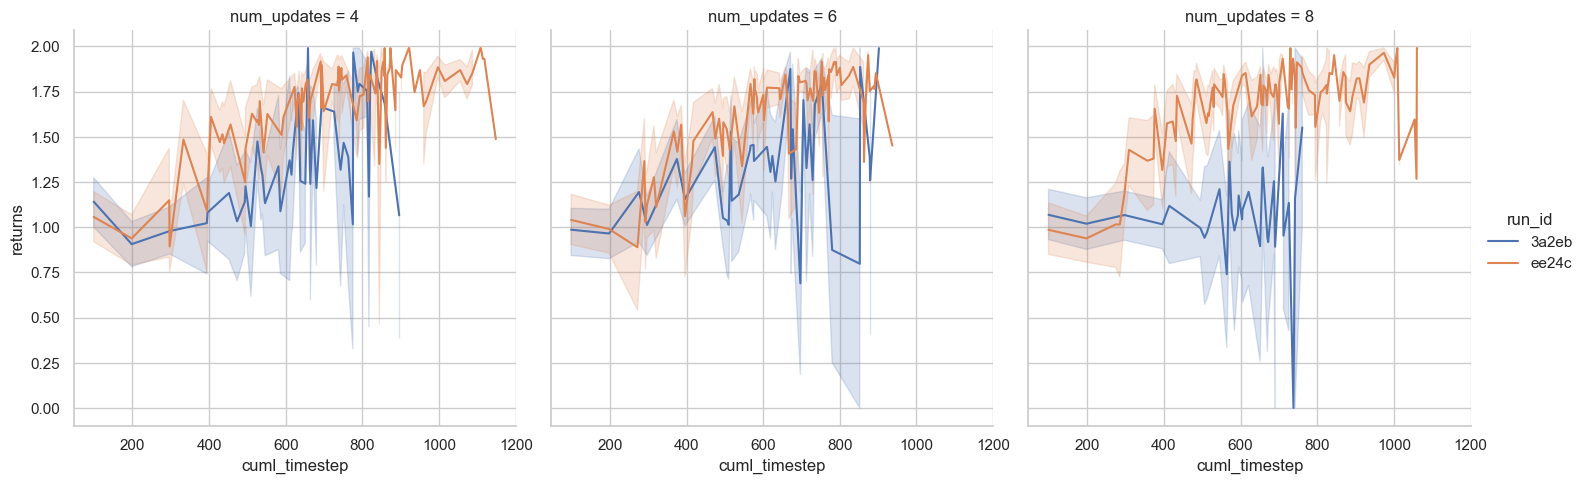

In [142]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = 'cuml_timestep'
y = 'returns'

g = sns.relplot(x=x, y=y, kind='line', hue='run_id', data=df, col='num_updates')